# Imports


In [47]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import numpy as np
from scripts.clusterer import CluStream
from scripts.dynamic_clusterer_multi_dimension import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

In [49]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [50]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [51]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 10587
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 16 ----> Apply macroclustering <!>



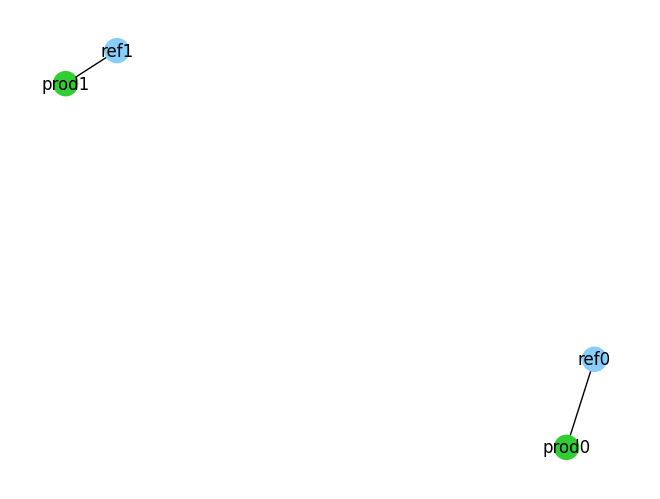

(id: 0) SURVIVED as (id: 0) (score: 0.9728159178276096)
(id: 1) SURVIVED as (id: 1) (score: 0.9754493632457909)
Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 207 ----> Apply macroclustering <!>



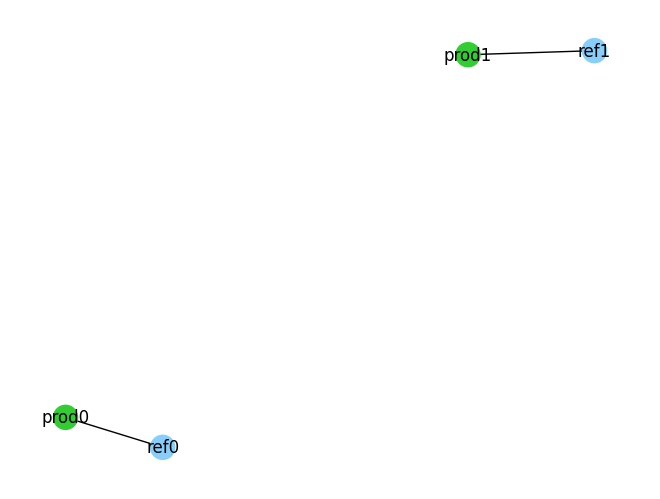

(id: 0) SURVIVED as (id: 0) (score: 0.8045972907038984)
(id: 1) SURVIVED as (id: 1) (score: 0.8787800876577941)
Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 303 ----> Apply macroclustering <!>



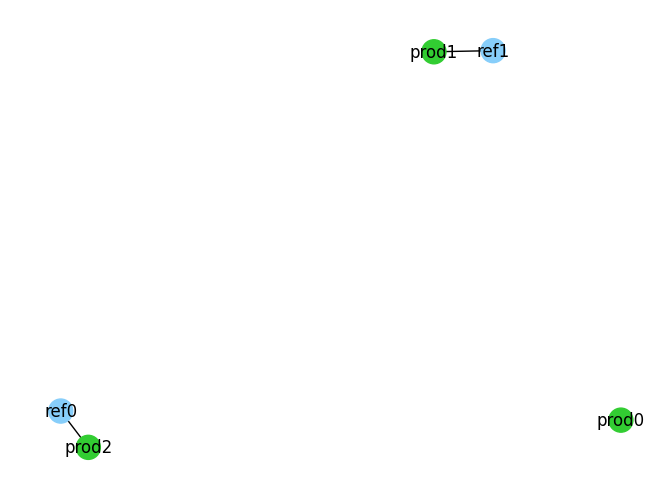

(!) (id: 2) APPEARED --- (score: 0.5212597900646524)
(id: 1) SURVIVED as (id: 1) (score: 0.8558410913584962)
(id: 0) SURVIVED as (id: 0) (score: 0.7704178599062368)
Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 666 ----> Apply macroclustering <!>



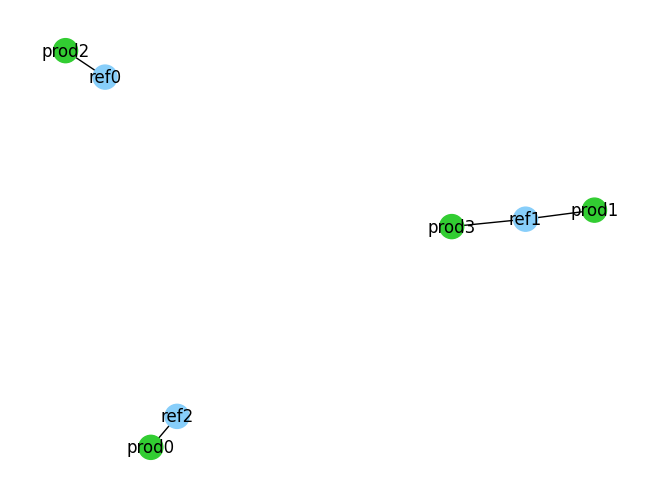

(id: 2) SURVIVED as (id: 2) (score: 0.8317769613931701)
(id: 1) SURVIVED as (id: 1) (score: 0.7340781667309554)
(id: 0) SURVIVED as (id: 0) (score: 0.9480482928807187)
(!) (id: 1) SURVIVED as (id: 3) but a SPLITTING is needed (score: 0.5615029007797951)
Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 984 ----> Apply macroclustering <!>



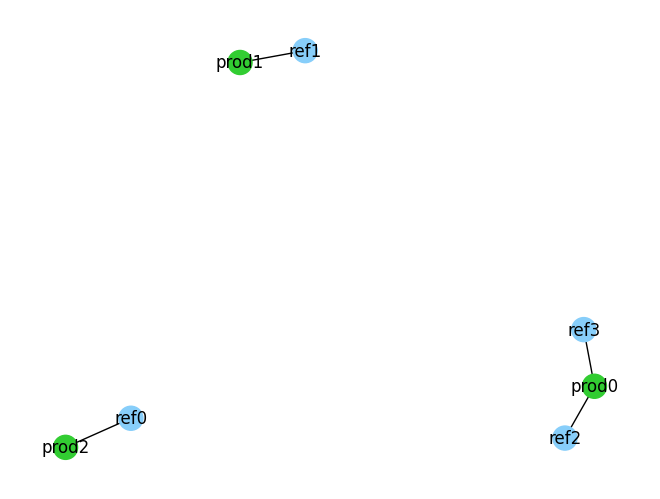

(!) [2, 3] are MERGED in (id: 4) (overlapping scores: [np.float64(0.6643191986208622), np.float64(0.643340785935096)])
(id: 1) SURVIVED as (id: 1) (score: 0.9913176276984488)
(id: 0) SURVIVED as (id: 0) (score: 0.9879336021436438)
Final macroclusters:
(id: 0)
(id: 1)
(id: 4)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering



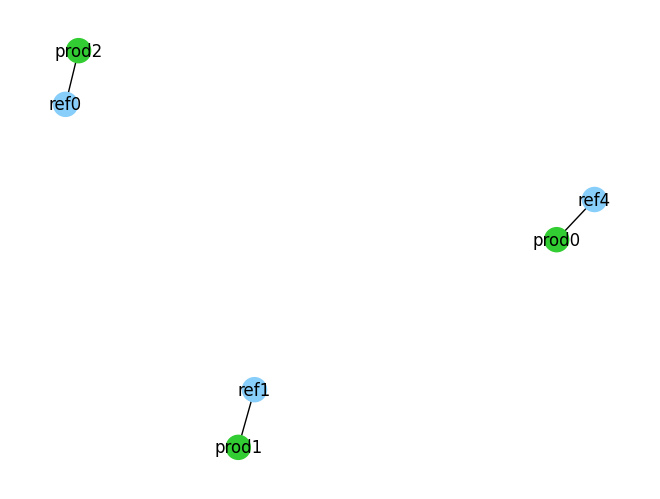

(id: 4) SURVIVED as (id: 4) (score: 0.98604323153623)
(id: 1) SURVIVED as (id: 1) (score: 0.9999999999999994)
(id: 0) SURVIVED as (id: 0) (score: 0.9999999999999987)
Final macroclusters:
(id: 0)
(id: 1)
(id: 4)

-----------------------------------------------------------------------------------



In [52]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(print_graph=True, macroclustering_at_end=True)

Drawing ...


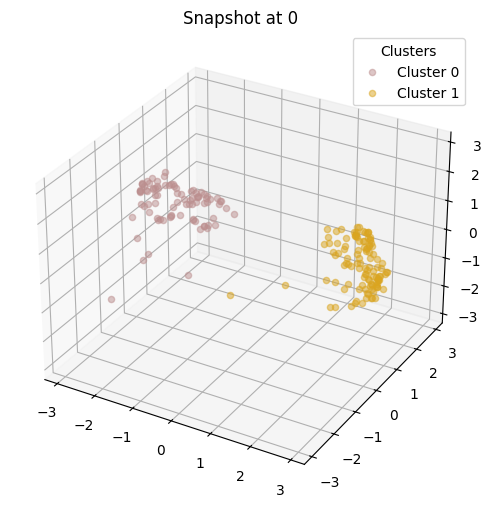

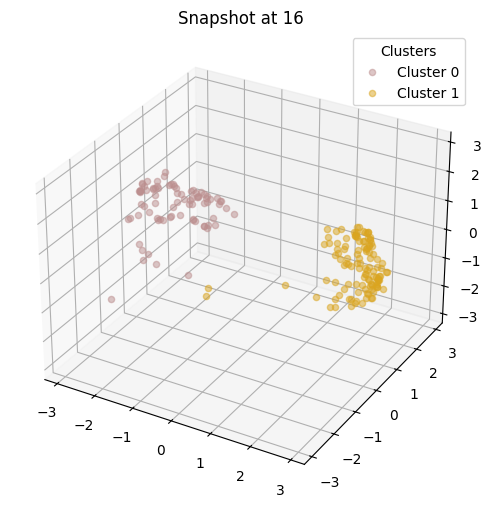

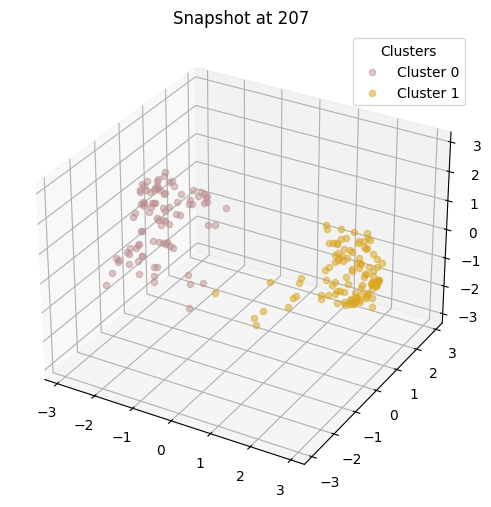

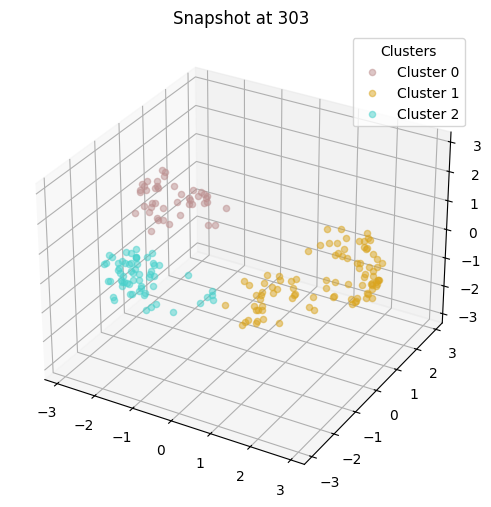

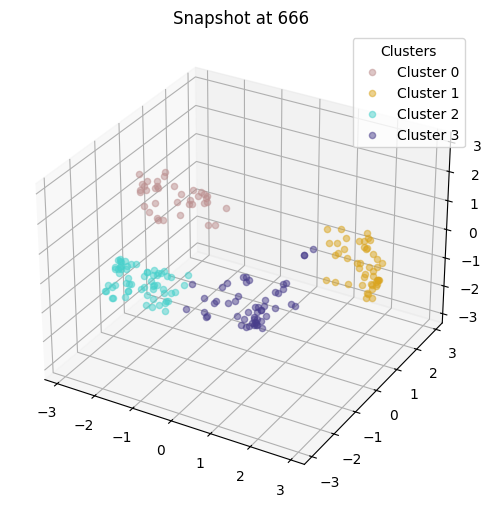

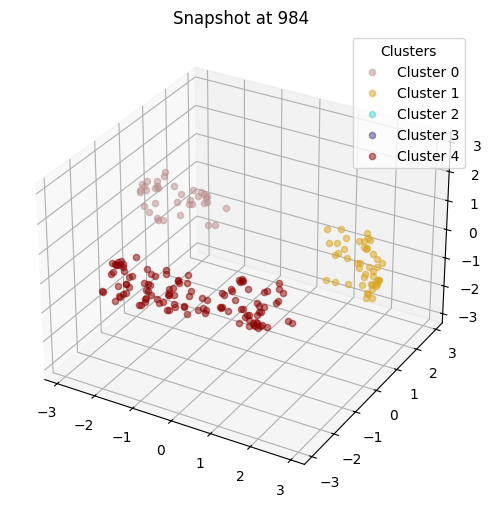

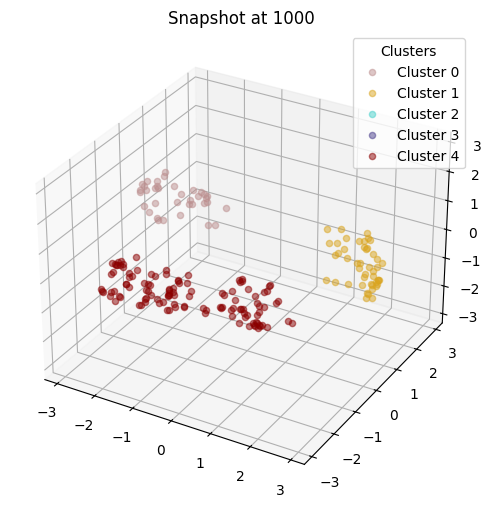

In [53]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True)

In [54]:
# Clean directory

# for id in ids:
#     ids.remove(id)
#     clean_directory(f"./plots/{id}")
#     print(f"Deleted {id}")
